# Download a ViSAPy data file

This is the retina data set generated with [ViSAPy](https://github.com/espenhgn/ViSAPy) as presented in Espen's [paper](http://dx.doi.org/10.1016/j.jneumeth.2015.01.029) in the Journal of Neuroscience Methods.

In [2]:
import urllib.request
file_url = 'https://datasync.ed.ac.uk/public.php/webdav'

password_mgr = urllib.request.HTTPPasswordMgrWithDefaultRealm()
password_mgr.add_password(None, file_url, "GbnXJ5bU3m9JPau", "HS2")
handler = urllib.request.HTTPBasicAuthHandler(password_mgr)
opener = urllib.request.build_opener(handler)
opener.open(file_url)
urllib.request.install_opener(opener)
with urllib.request.urlopen(file_url) as response, open('visapy_data.npy', 'wb') as out_file:
    data = response.read()
    out_file.write(data)

# Use of the `HSDetection` class

In [1]:
from herdingspikes.hs2 import HSDetection
from herdingspikes.probe import HierlmannVisapyEmulationProbe
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# raw data location
data_path = 'visapy_data.npy'

# detection parameters
file_directory = 'results/'
file_name = 'ProcessedSpikes_visapy'

In [18]:
Probe = HierlmannVisapyEmulationProbe(data_path, inner_radius=60, neighbor_radius=100)

H = HSDetection(Probe, num_com_centers=4, threshold=12,
                maa=0, ahpthr=0, out_file_name=file_name,
                left_cutout_time=0.45, right_cutout_time=1.12,
                spk_evaluation_time=0.375, amp_evaluation_time=0.09,
                file_directory_name=file_directory, decay_filtering=False, save_all=True)

File size: 122400102
Number of channels: 102


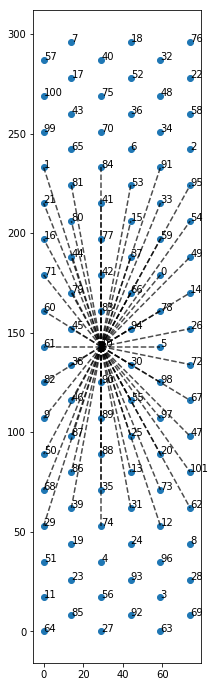

In [5]:
Probe.show()

In [19]:
H.DetectFromRaw()

# Not Masking any Channels
# Sampling rate: 32000
# Localization On
# Writing out extended detection info
# Number of recorded channels: 102
# Analysing frames: 1200001; Seconds: 37.50003125
# Frames before spike in cutout: 14
# Frames after spike in cutout: 36
# MaxSl: 12
# MinSl: 3
# tcuts: 26 48
# tInc: 50000
# Analysing frames from -26 to 50048  (0.0%)
# Analysing frames from 49974 to 100048  (4.2%)
# Analysing frames from 99974 to 150048  (8.3%)
# Analysing frames from 149974 to 200048  (12.5%)
# Analysing frames from 199974 to 250048  (16.7%)
# Analysing frames from 249974 to 300048  (20.8%)
# Analysing frames from 299974 to 350048  (25.0%)
# Analysing frames from 349974 to 400048  (29.2%)
# Analysing frames from 399974 to 450048  (33.3%)
# Analysing frames from 449974 to 500048  (37.5%)
# Analysing frames from 499974 to 550048  (41.7%)
# Analysing frames from 549974 to 600048  (45.8%)
# Analysing frames from 599974 to 650048  (50.0%)
# Analysing frames from 649974 to 700048  (54

In [20]:
H.LoadDetected()

Detected and read 37703 spikes.


Spike detected at channel:  10
Spike detected at frame:  4370
Spike localised in position 39.895 145.368
trange (100,)
Data (100, 102)


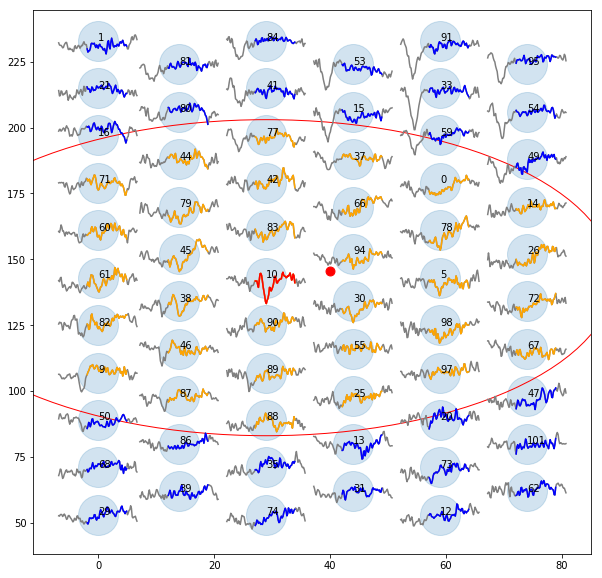

In [21]:
plt.figure(figsize=(10, 10))
H.PlotTracesChannels(145, window_size=100)

(0, 70)

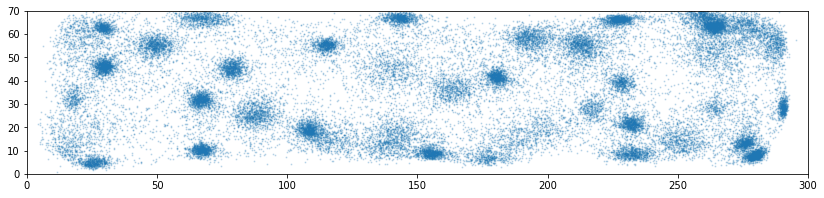

In [22]:
plt.figure(figsize=(14, 3))
ax = plt.subplot(111)
H.PlotAll(invert=True, s=1, alpha=0.2, ax=ax)
#ax.set_xlim((270,300))
ax.set_xlim((0,300))
ax.set_ylim((0,70))

# Use of the `HSClustering` class

In [23]:
from herdingspikes.hs2 import HSClustering

In [24]:
# read
C = HSClustering(H)

In [25]:
%%time
C.ShapePCA(pca_ncomponents=2, pca_whiten=True)

Fitting PCA using 37703 spikes...
...projecting...
...done
CPU times: user 716 ms, sys: 133 ms, total: 849 ms
Wall time: 742 ms


In [26]:
%%time
# note parameters are not particularly optimised (yet)
C.CombinedClustering(alpha=4, bandwidth=5., bin_seeding=False, n_jobs=-1)

Clustering...
Clustering 37703 spikes...
number of seeds: 37703
seeds/job: 9426
using 4 cpus


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  3.2min finished


Number of estimated units: 606
CPU times: user 607 ms, sys: 179 ms, total: 786 ms
Wall time: 3min 13s


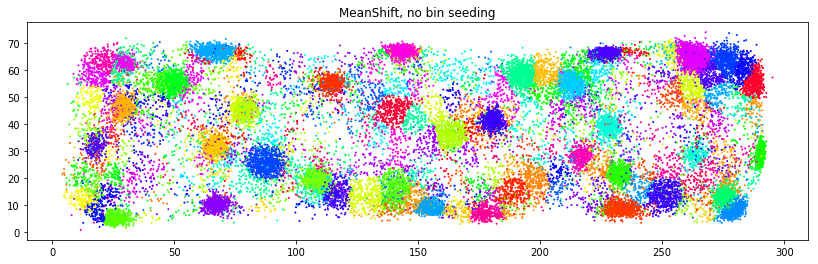

In [27]:
plt.figure(figsize=(14, 4))
ax = plt.subplot(111)
C.PlotAll(invert=True, s=1, ax=ax, max_show=100000,show_labels=False)
plt.title("MeanShift, no bin seeding");

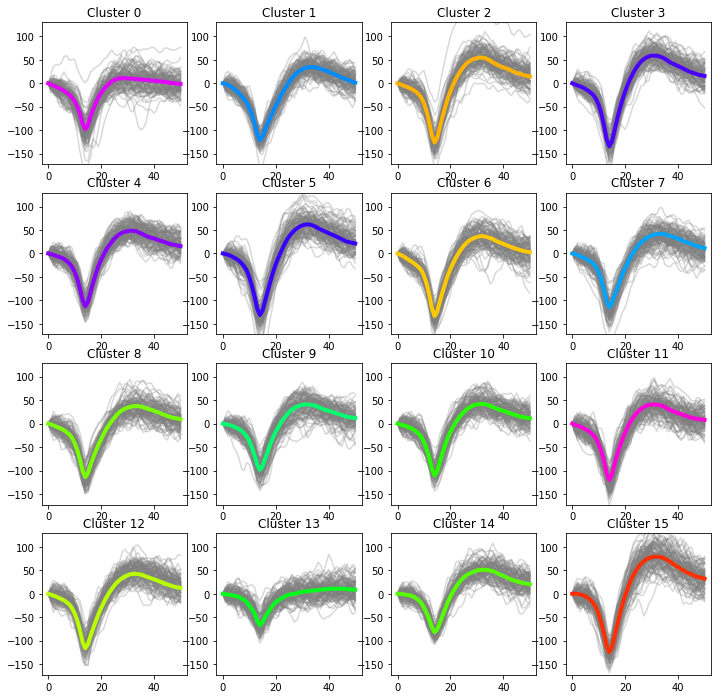

In [28]:
units = range(16)
C.PlotShapes(units)

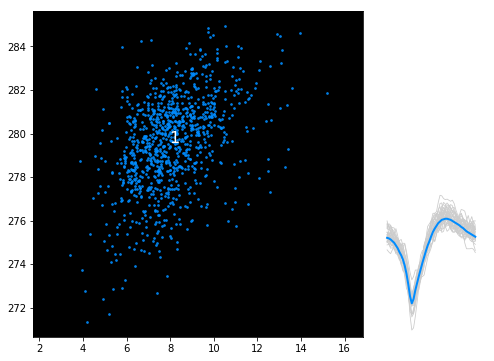

In [29]:
C.PlotNeighbourhood(1,radius=6, alpha=0.8);

In [ ]:
C.SaveHDF5(file_name+"_sorted.hdf5")